In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../../models")
from pcpca import PCPCA

In [74]:
mhealth_dfs = []
for ii in range(1, 11):
    a = pd.read_table("/Users/andrewjones/Downloads/MHEALTHDATASET/mHealth_subject{}.log".format(ii), header=None)
    mhealth_dfs.append(a)

In [75]:
data = pd.concat(mhealth_dfs, axis=0)

In [76]:
data.iloc[:, -1].value_counts()

0     872550
11     30720
10     30720
9      30720
5      30720
4      30720
3      30720
2      30720
1      30720
7      29441
8      29337
6      28315
12     10342
Name: 23, dtype: int64

In [77]:
Y = data[data.iloc[:, -1] == 3]
X = data[data.iloc[:, -1].isin([8, 9])]
X_labels = X.iloc[:, -1].values

X = X.iloc[:, :-1]
Y = Y.iloc[:, :-1]

X -= X.mean(0)
X /= X.std(0)
X = X.T

Y -= Y.mean(0)
Y /= Y.std(0)
Y = Y.T

n, m = X.shape[1], Y.shape[1]
X.shape, Y.shape

((23, 60057), (23, 30720))

In [78]:
C_x = np.cov(X)
C_y = np.cov(Y)

In [79]:
X_eigvals = -np.sort(-np.linalg.eig(C_x)[0])
Y_eigvals = -np.sort(-np.linalg.eig(C_y)[0])

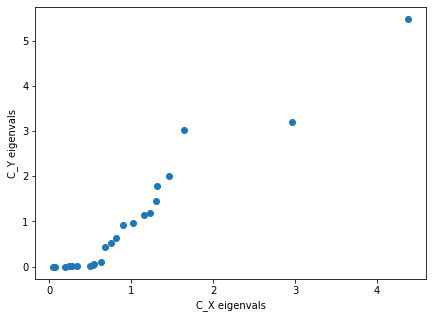

In [80]:
plt.figure(figsize=(7, 5))
plt.scatter(X_eigvals, Y_eigvals)
plt.xlabel("C_X eigenvals")
plt.ylabel("C_Y eigenvals")
plt.show()

In [81]:
gamma = 0.9
pcpca = PCPCA(gamma=gamma * n/m, n_components=2)
X_reduced, Y_reduced = pcpca.fit_transform(X, Y)
print(pcpca.sigma2_mle)

-251229.3089601166
-1.9949659145927556


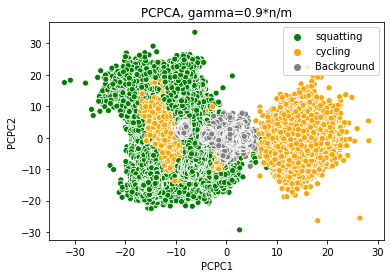

In [82]:
X_reduced_df = pd.DataFrame(X_reduced.T)
X_reduced_df.columns = ["PCPC1", "PCPC2"]
X_reduced_df['condition'] = ["squatting" if x == 8 else "cycling" for x in X_labels]

Y_reduced_df = pd.DataFrame(Y_reduced.T)
Y_reduced_df.columns = ["PCPC1", "PCPC2"]
Y_reduced_df['condition'] = ["Background" for _ in range(Y_reduced_df.shape[0])]

results_df = pd.concat([X_reduced_df, Y_reduced_df], axis=0)

sns.scatterplot(data=results_df, x="PCPC1", y="PCPC2", hue=results_df.condition.values, palette=['green','orange','gray'])
# plt.xlabel("CPC1")
# plt.ylabel("CPC2")

# ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])
plt.title("PCPCA, gamma={}*n/m".format(gamma))
plt.show()

In [83]:
results_df.condition.unique()

array(['squatting', 'cycling', 'Background'], dtype=object)

2856.6181645365828
-126204.74685797804
-157018.05267209478
-188178.82301818408
-251229.3089601166


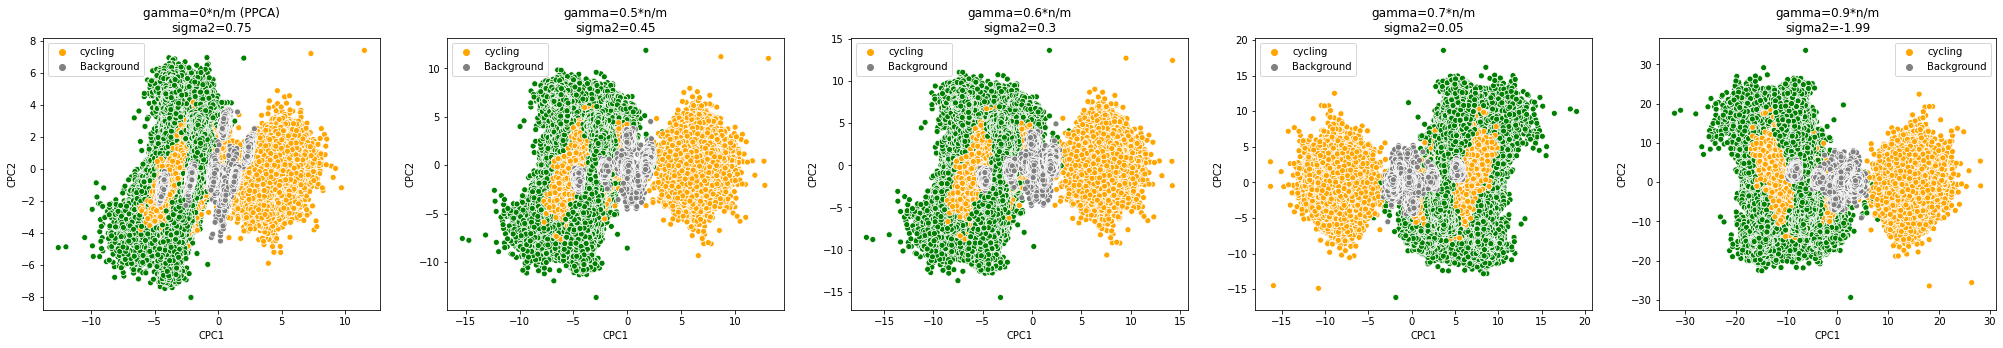

In [84]:
gamma_range = [0, 0.5, 0.6, 0.7, 0.9]
plt.figure(figsize=(len(gamma_range) * 7, 5))

for ii, gamma in enumerate(gamma_range):
    # gamma = gamma
    pcpca = PCPCA(gamma=n/m*gamma, n_components=2)
    X_reduced, Y_reduced = pcpca.fit_transform(X, Y)
    # cpca = CPCA(gamma=gamma, n_components=N_COMPONENTS)
    # X_reduced, Y_reduced = cpca.fit_transform(X, Y)

    plt.subplot(1, len(gamma_range), ii+1)
    if gamma == 0:
        plt.title("gamma={}*n/m (PPCA)\nsigma2={}".format(gamma, round(pcpca.sigma2_mle, 2)))
    else:
        plt.title("gamma={}*n/m\nsigma2={}".format(gamma, round(pcpca.sigma2_mle, 2)))

    # Plot reduced foreground data
    X_reduced_df = pd.DataFrame(X_reduced.T)
    X_reduced_df.columns = ["PCPC1", "PCPC2"]
    X_reduced_df['condition'] = ["squatting" if x == 8 else "cycling" for x in X_labels]

    Y_reduced_df = pd.DataFrame(Y_reduced.T)
    Y_reduced_df.columns = ["PCPC1", "PCPC2"]
    Y_reduced_df['condition'] = ["Background" for _ in range(Y_reduced_df.shape[0])]

    results_df = pd.concat([X_reduced_df, Y_reduced_df], axis=0)

    sns.scatterplot(data=results_df, x="PCPC1", y="PCPC2", hue=results_df.condition.values, palette=['green','orange','gray'])
    plt.xlabel("CPC1")
    plt.ylabel("CPC2")

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])